## Testing of K-Nearest Neighbors on Task A2

In [10]:
#Import libraries
import cv2
import numpy as np
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Load one image and its size will be used later
img = cv2.imread('../Datasets/celeba/img/0.jpg',cv2.IMREAD_GRAYSCALE)

In [3]:
#Read the csv. file
df = pd.read_csv('../Datasets/celeba/labels.csv',sep='\t')
#In this task, only the 'smiling' column is useful
y = np.array(df['smiling'])

E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [4]:
#Initialization of sample matrix X
X = np.zeros((5000,img.size//4))
#Read and slice each image, then save it as a row of X
for i in range(5000):
    img = cv2.imread('../Datasets/celeba/img/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
    img_Rcompressed = img[np.arange(1,img.shape[0]+1,2)] #Delete one row for each two
    img_compressed = img_Rcompressed[:,np.arange(1,img.shape[1]+1,2)] #Delete one column for each two
    X[i,:] = img_compressed.reshape(1,img_compressed.size)

E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


In [5]:
#Training-validation split in a ratio 3:1
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [15]:
#Define a KNN classifier which trains the model based on training set and gives 
#a prediction on the test set
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model
    
    #Make a prediction with the trained model
    Y_pred = neigh.predict(X_test)
    return Y_pred

#Timer of the training process
time_start = time.time()
#Initialization of accuracy list
accuracy = np.zeros(20)
#Validation process of K-coefficient
for i in range (20):
    # Make a prediction with the gived K
    Y_pred=KNNClassifier(x_train, y_train, x_test,(i+1)*10)
    # Calculate the validation accuracy
    score=accuracy_score(y_test,Y_pred)
    # Store the result
    accuracy[i] = score

time_end = time.time()
running_time = time_end-time_start
print(f'finish training! total running time: {running_time}s')

E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


finish training! total running time: 1425.6875584125519s


E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


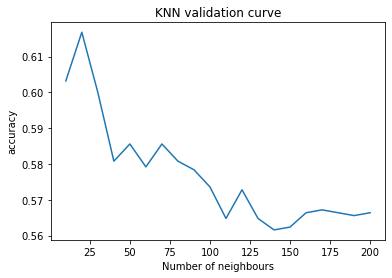

In [18]:
#Plot the validation curve with accuracy list against K-coefficient
plt.plot(np.linspace(10,200,20),accuracy)
plt.title('KNN validation curve')
plt.xlabel('Number of neighbours')
plt.ylabel('accuracy')

plt.show()